In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import warnings

import os
for dirname, _ , files in os.walk('Datasets'):
    for file in files:
        print(os.path.join(dirname, file))

Datasets/test.csv
Datasets/train.csv
Datasets/gender_submission.csv


In [2]:
train_df = pd.read_csv("Datasets/train.csv")
test_df = pd.read_csv('Datasets/test.csv')
gender_submission = pd.read_csv('Datasets/gender_submission.csv')

# Checking whether the subscription is accurate

This Kaggle notebook came with a sample subcription for this model, in which it predicts the survival rate by sex. Following the exercises in the kaggle course, I will check the degree of accuracy of the predictions for this subscription first before going into the model.

In [3]:
women_who_survived = train_df.loc[train_df.Sex == 'female']['Survived']
women_survival_rate = sum(women_who_survived) / len(women_who_survived)
print(f"Women Survival Rate %: {women_survival_rate * 100:.2f}")

men_who_survived = train_df.loc[train_df.Sex == 'male']['Survived']
men_survival_rate = sum(men_who_survived) / len(men_who_survived)
print(f"Women Survival Rate %: {men_survival_rate* 100:.2f}")


Women Survival Rate %: 74.20
Women Survival Rate %: 18.89


## Exploring Data

In this section I will be first exploring the datasets, in order to identify the presence of missing values, the features involved and how to interpret them.

First, taking a look at both train and test dataframes to check if they have the same amount of columns and their sizes.

In [4]:
train_rows, train_columns = len(train_df.index), len(train_df.columns)
test_size, test_columns = len(test_df.index), len(test_df.columns)
print(f"Test has {test_size} rows and {test_columns} columns, while train has {train_rows} rows and {train_columns} columns")

Test has 418 rows and 11 columns, while train has 891 rows and 12 columns


In [5]:
test_columns = test_df.columns.tolist()
train_columns = train_df.columns.tolist()
print(f"Train Columns:{sorted(train_columns)}\nTest Columns: {sorted(test_columns)}")

Train Columns:['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket']
Test Columns: ['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket']


Analyzing the central tendencias and additional information for the columns.

In [6]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Petroff, Mr. Nedelio",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Some points to consider here:
- PassengerId is merely an identified, we whould drop it.
- Survived is the target variable, should be separated.
- PClass is a value between one and three and probably relates to Fare.
- Name and Sex are fully present.
- Ticket has about 30% missing values. Even though there might be possible to infer ship location through the ticket, we are not sure this is the case.
- Cabin has a lot og missing values. Even though it might be a good indicator of the presennce of the room, due to invalid information it should be dropped.
- Embarked is almost fully present but only contains three values.

## Data Exploration

First we'll check how the survival rate relates to passenger class 'Pclass'.

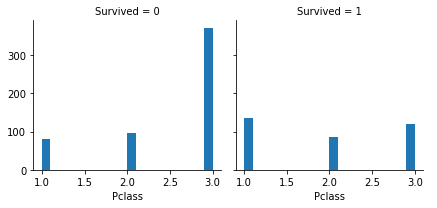

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)
g.add_legend()
plt.show()

We can see that even though we have much more people in Pclass 3, it doesnt really mean that they have a higher survival rate. Since it seems that Pclass is correlated to fare, it may seem that people in with Class 1 had more purchasing power and therefore had been chosen for the boats first.

Now we want to see how survival rate is affected by the age of the passengers.

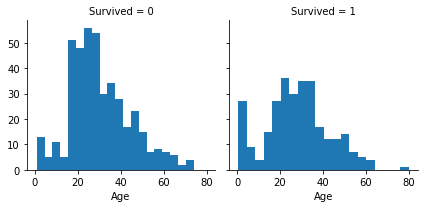

In [8]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
g.add_legend
plt.show()

We can see that we had present much more people around the ages of 15 to 20, even though that may not really indicate that they survived. The oens around the ages of 50+ tend to survive more. Lets check how that divides by the PassengerClass

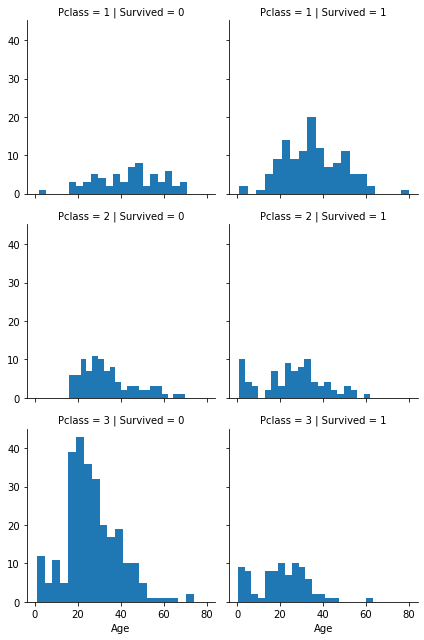

In [9]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass')
g.map(plt.hist, 'Age', bins=20)
g.add_legend
plt.show()

# A few assumptions from here:
- In P1 had the most passengers that survived. 
- P2 had a the second higher number of survivors.
- P3 had the most passengers and had the least amout of people that survived

Now we can check how the embarked location relates to Pclass in the survival rate

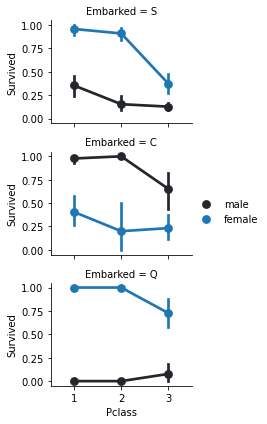

In [10]:
warnings.filterwarnings('ignore')
g = sns.FacetGrid(train_df, row='Embarked', height=2, aspect=1.5)
g.map(sns.pointplot, 'Pclass', 'Survived','Sex', estimator=np.mean)
g.add_legend()
plt.show()

Now we got to analyze if there is a positive correlation of the surivival rate vs the fare paid by the passenger. Here we can check whether the pclass attribute is also related to fare as well. 

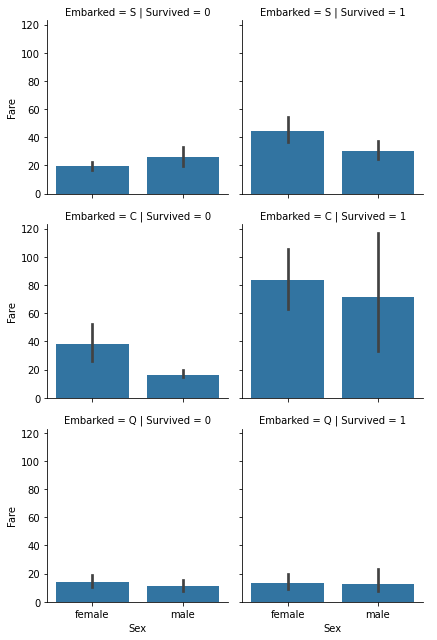

In [11]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend()

Seems to confirm that higher Fares mean higher survival rate. In order to capture this, we may want to create fare bands.

## Data Cleaning and feature engineering

Based on initial findings above, I should try to create new columns, drop unnecessary ones or adapt existing ones according to necessity.

In [12]:
#create family column
train_df['family'] = train_df['SibSp'] + train_df['Parch']
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [13]:
#drop passenger Id, column and ticket since either they are unnecessary or they are missing data
train_df = train_df.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


Now I'll start to make adaptations to the dataset. Since I have them already split into training and test, I will combine them first so I can make the changes in both datasets at once.

In [14]:
combined_df = {'train': train_df, 'test': test_df}
for key, v in combined_df.items():
    print(f'{key} shape is {v.shape}')

train shape is (891, 10)
test shape is (418, 11)


In [15]:
for index, dataset in combined_df.items():
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

Above we extracted tbe titles from the names, however some names could be replaced and standardized to more common terms. We do this so that we can have fewer categories, process similar to grouping fares in bands.

In [16]:
pd.crosstab(combined_df.get('train')['Title'], combined_df.get('train')['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
# Just as an exercise I will try grouping the normal ones, military grade ones an the reamining ones
military_titles = ['Major', 'Col', 'Capt']
royalty_titles = ['Countess']
miss_synonims = ['Mlle', 'Ms']
normals = ['Mr', 'Mrs', 'Miss', 'Master', 'Military', 'Royalty']

for _, dataset in combined_df.items():
    dataset['Title'] = dataset['Title'].replace(military_titles, 'Military')
    dataset['Title'] = dataset['Title'].replace(royalty_titles, 'Royalty')
    dataset['Title'] = dataset['Title'].replace(miss_synonims, 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

others = [x for x in combined_df.get('train')['Title'].unique() if x not in (military_titles + royalty_titles + miss_synonims + normals)]
print(others)
combined_df.get('train')[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() 

['Don', 'Rev', 'Dr', 'Lady', 'Sir', 'Jonkheer']


,Title,Survived
0,Don,0.000000
1,Dr,0.428571
2,Jonkheer,0.000000
3,Lady,1.000000
4,Master,0.575000
5,Military,0.400000
6,Miss,0.702703
7,Mr,0.156673
8,Mrs,0.793651
9,Rev,0.000000


In [18]:
for _, dataset in combined_df.items():
    dataset['Title'] = dataset['Title'].replace(others, 'Others') 
combined_df.get('train')[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() 
# Now i got to convert them into integers, 
maps = {v: k for k,v in enumerate(combined_df.get('train')['Title'].unique())}
print(maps)



{'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Others': 4, 'Military': 5, 'Royalty': 6}


In [19]:
for _, dataset in combined_df.items():
    dataset['Title'] = dataset['Title'].map(maps)
    dataset['Title'] = dataset['Title'].fillna(0)

combined_df.get('train')[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() 

,Title,Survived
0,0,0.156673
1,1,0.793651
2,2,0.702703
3,3,0.575000
4,4,0.294118
5,5,0.400000
6,6,1.000000


In [24]:
for _, dataset in combined_df.items():
    dataset = dataset.drop('Name', axis=1, inplace=True)

combined_df.get('train').head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,Title
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,1
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,1,1
4,0,3,male,35.0,0,0,8.0500,S,0,0


Now ill also map male and females to integers

In [25]:
sex_map = {'male': 0, 'female': 1}

for _, dataset in combined_df.items():
    dataset['Sex'] = dataset['Sex'].map(sex_map)

combined_df.get('train').head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,Title
0,0,3,0,22.0,1,0,7.2500,S,1,0
1,1,1,1,38.0,1,0,71.2833,C,1,1
2,1,3,1,26.0,0,0,7.9250,S,0,2
3,1,1,1,35.0,1,0,53.1000,S,1,1
4,0,3,0,35.0,0,0,8.0500,S,0,0
